### Python scripts to create figures fot LaTeX

In [2]:
import platform
from pathlib import Path
from importlib import reload
import sys

In [4]:
os_name = platform.system()
if os_name == 'Darwin':
    gd_path = str(Path.home()/'Library/Mobile Documents/com~apple~CloudDocs/gd')
elif os_name == 'Linux':
    gd_path = str(Path.home()/'gd')
else:
    raise ValueError("You are not on either Darwin or Linux OS")

In [3]:
sys.path.append(gd_path + '/projects/ftnmr/scripts')
sys.path.append(gd_path + '/projects/mods/scripts')

In [4]:
sys.path

['/home/sejin8642/gd/projects/ftnmr/latex/temp.ft',
 '/home/sejin8642/anaconda3/lib/python38.zip',
 '/home/sejin8642/anaconda3/lib/python3.8',
 '/home/sejin8642/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/sejin8642/anaconda3/lib/python3.8/site-packages',
 '/home/sejin8642/gd/projects/ftnmr/scripts',
 '/home/sejin8642/gd/projects/mods/scripts']

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### importing and instantiating fid module

In [6]:
import fid
import ftnmr
import mods

In [7]:
s = fid.fid(T2=100, B=0.25, shift_maximum=32.0, t_cut=2000)
x = s.t
y = s.signal

In [8]:
s.f0

0.05322184814729069

In [9]:
s.ns

1024

### Plotting s vs. t for LaTeX

In [10]:
# default plt style to fix jupyter notebook margin issue when plotting
plt.style.use('default')

In [11]:
def graph(x, y, xlabel=r'$x$', ylabel=r'$y$', save=False, filename='figure.eps'):
    # LaTeX font with size 9
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": 'serif',
        "font.size": 9})
    
    # plots y vs. x in black line with linesize 2 with the given axes
    fig = plt.figure(figsize=(6,4), dpi=500)
    ax = fig.add_subplot(111)
    
    # minimums and maximums of x and y 
    xmin, xmax, ymin, ymax = min(x), max(x), min(y), max(y)
    print(xmin, xmax, ymin, ymax, sep='    ')
    
    # reset minimum and maximum of y if y-range does not contain 0
    if 0 < ymin: ymin = -0.1*ymax
    if ymax < 0: ymax = -0.1*ymin
    
    # axis label coordinate adjustments
    x_pos_for_y_label = -xmin/(xmax - xmin)
    y_pos_for_x_label = -ymin/(ymax - ymin) + 0.02
    print(
        f"x_pos_for_y_label: {x_pos_for_y_label}", 
        f"y_pos_for_x_label: {y_pos_for_x_label}",
        sep='    ')
    
    # configures plot axes, labels and their positions with arrow axis tips
    if (xmin <= 0) and (0 < xmax):
        ax.spines['left'].set_position(('data', 0))
        ax.set_ylabel(ylabel, rotation=0)
        ax.yaxis.set_label_coords(x_pos_for_y_label, 1.02)
        ax.plot(0, 1, "^k", markersize=3, transform=ax.get_xaxis_transform(), clip_on=False)
    else:
        ax.spines['left'].set_visible(False)
        ax.set_ylabel(ylabel).set_visible(False)

    ax.spines['bottom'].set_position(('data', 0)) 
    ax.set_xlabel(xlabel)
    ax.xaxis.set_label_coords(1.02, y_pos_for_x_label)
    ax.plot(1, 0, ">k", markersize=3, transform=ax.get_yaxis_transform(), clip_on=False)

    # plots y vs. x in black line with linesize 2 with the given axes
    plt.plot(x, y, 'k-', linewidth=.5)
    plt.axis([xmin, xmax, 1.1*ymin, 1.1*ymax])

    # change the spine linewidth
    plt.rcParams['axes.linewidth'] = 0.2

    # deletes top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # changes the size of ticks (both major and minor) to zero if ticks==False
    ax.tick_params(axis=u'both', which=u'both', length=0)

    # no tick labels
    plt.xticks([])
    plt.yticks([])
    
    # save the figure as eps vector image if save==True
    if (save == True): 
        plt.savefig(filename, format='eps', transparent=True)
    
    # show the plot
    plt.show()

In [12]:
%matplotlib inline
plt.style.use('default')

In [13]:
s = fid.fid(T2=200, B=0.05, shift_maximum=128.0, t_cut=1000, shift=8.0)
x = s.t
y = s.signal

0.0    1875.2578306524035    -0.8634742350769862    1.0
x_pos_for_y_label: -0.0    y_pos_for_x_label: 0.48336794940516753


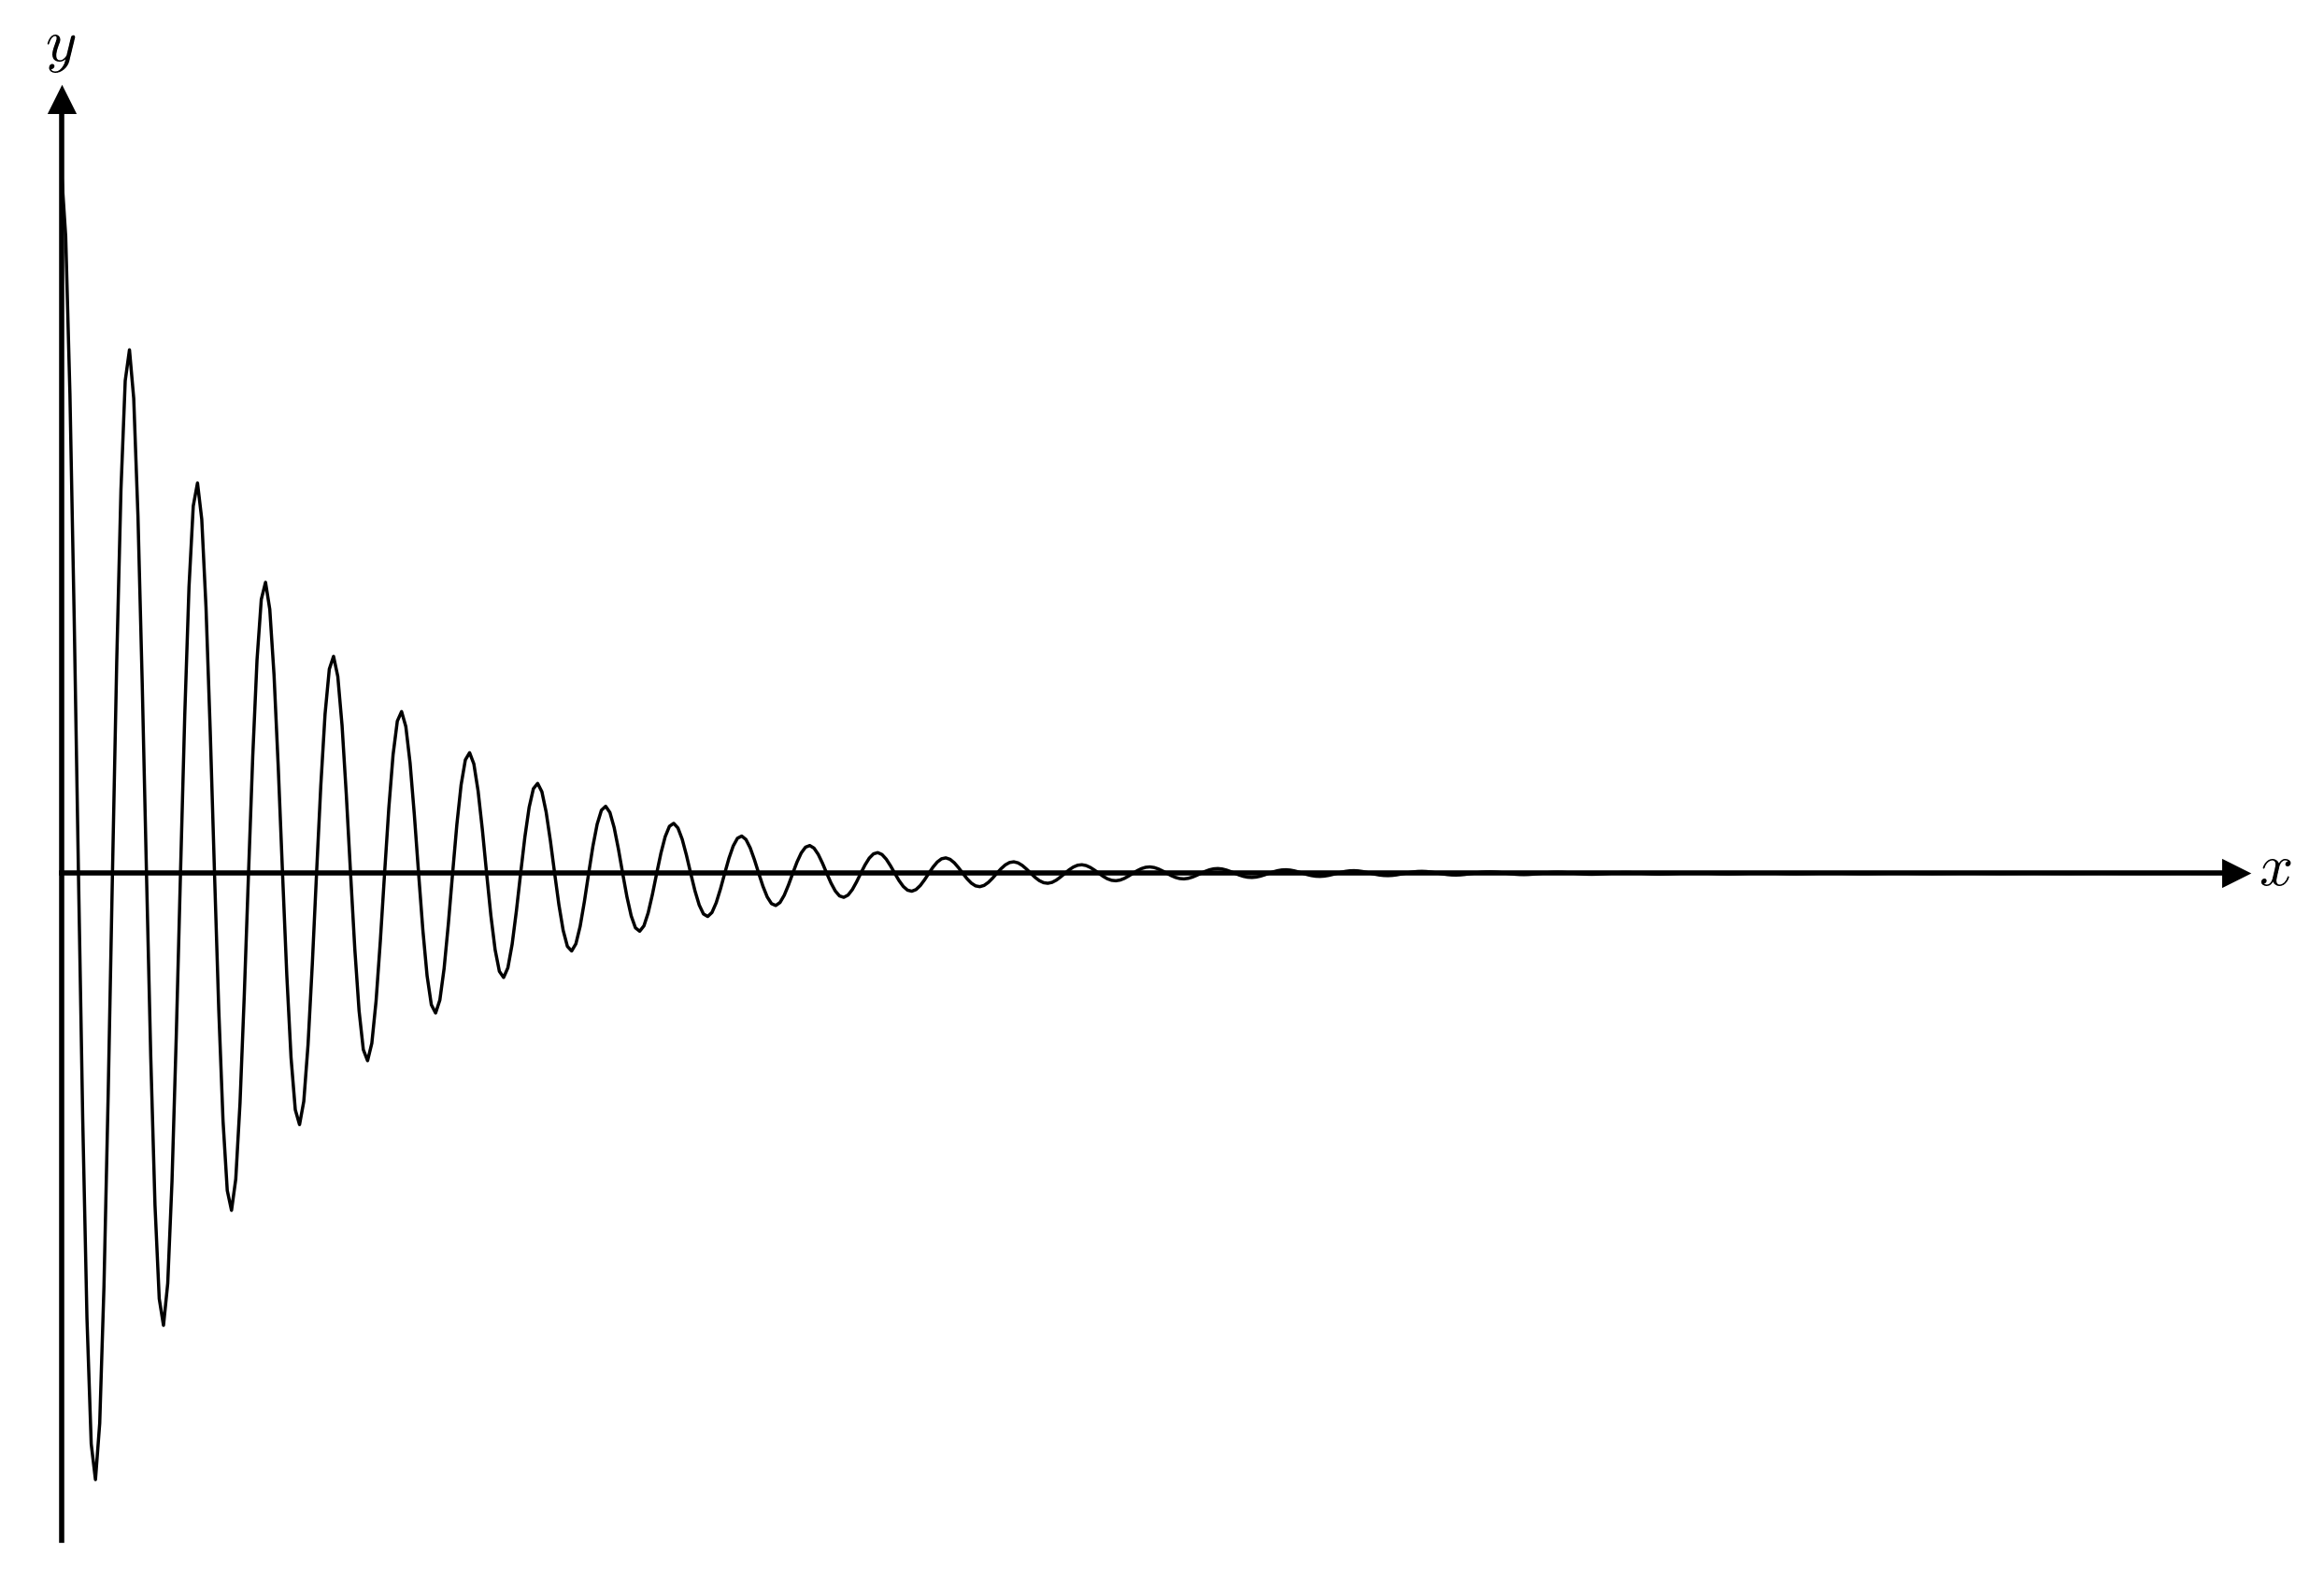

In [14]:
graph(x, y.real)

In [15]:
Y = scipy.fft.fft(y)

In [16]:
f = np.fft.fftfreq(len(y), d=s.dt)

In [17]:
f_n = np.roll(f, len(f)//2)
f_n = f_n - f_n[0]

0.0    0.2719636440326555    0.5045451310015849    54.996127226073135
x_pos_for_y_label: -0.0    y_pos_for_x_label: 0.1109090909090909


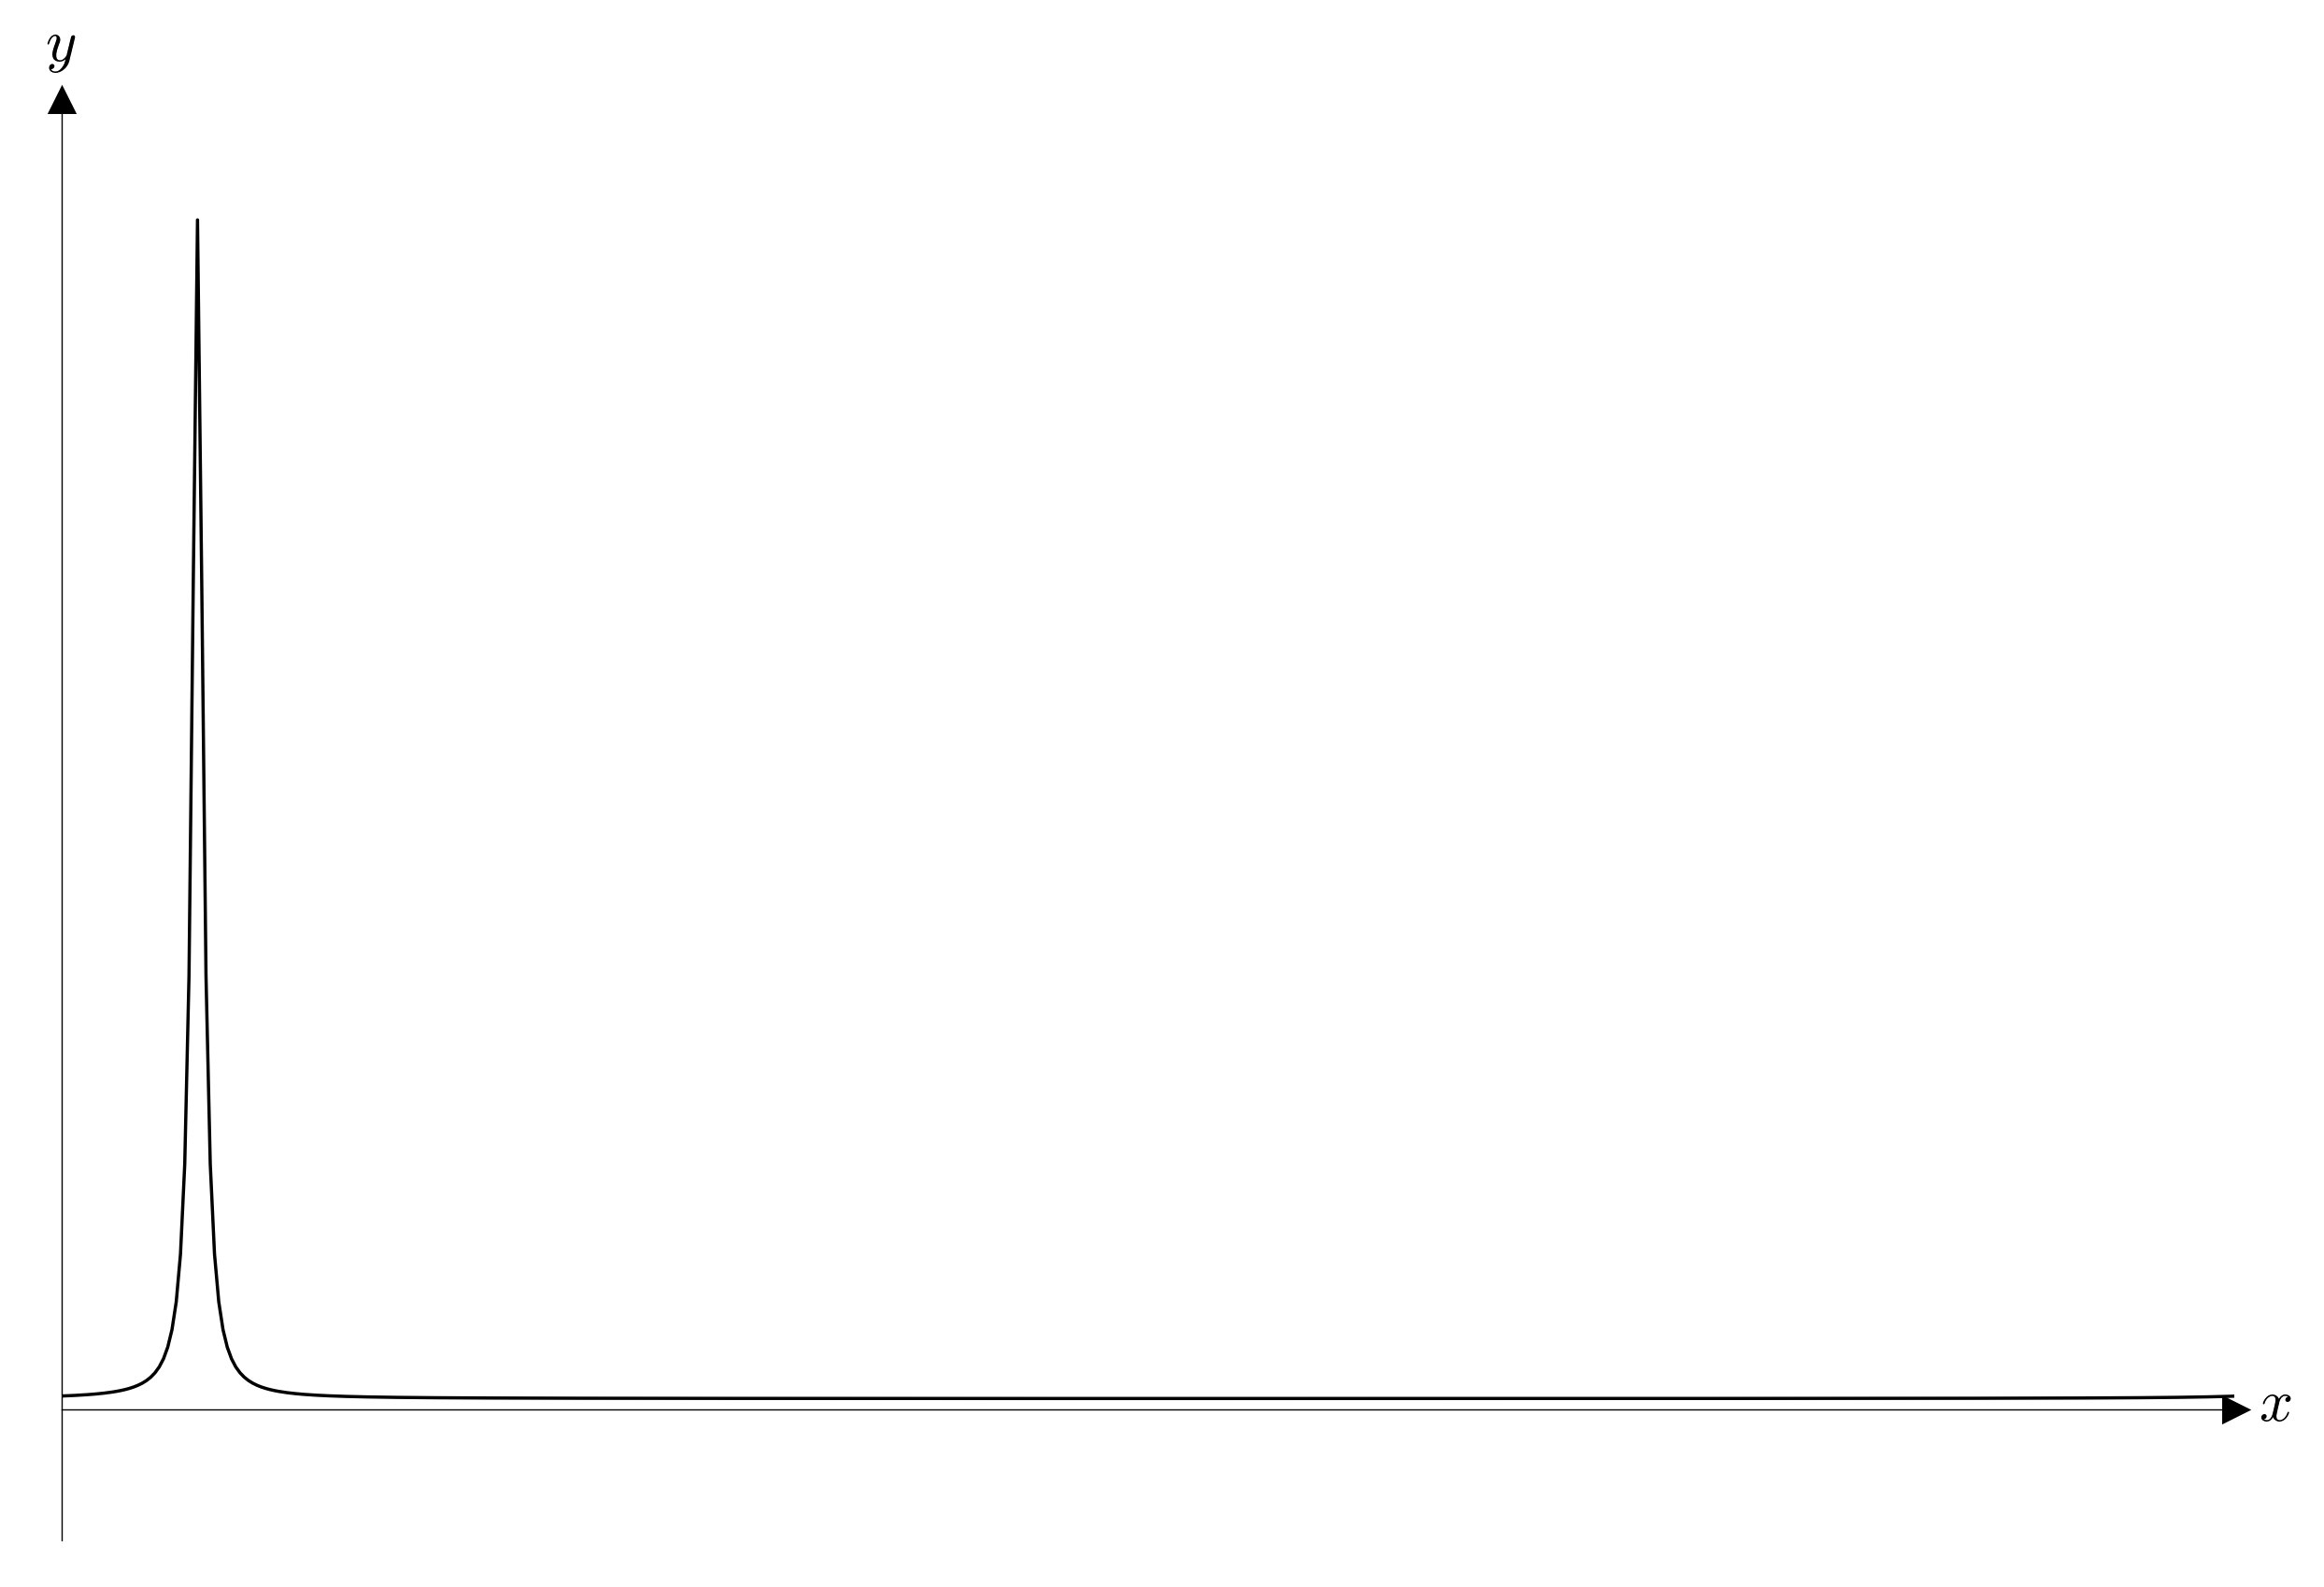

In [18]:
graph(f_n, Y.real)

In [19]:
s.f_l

2128.873925891628

In [20]:
f_in_shift = 10**6*f_n/s.f_l
f_in_shift[-1] + f_in_shift[1]

128.00000000000003

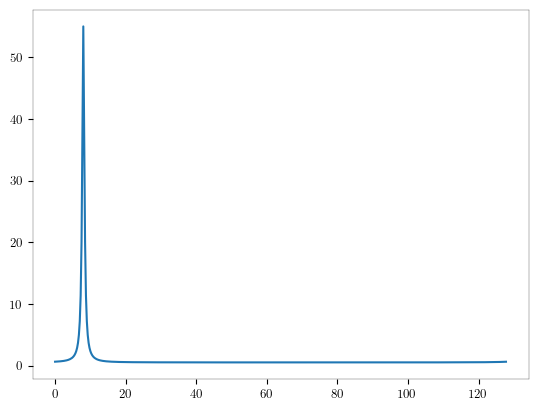

In [21]:
plt.plot(f_in_shift, Y.real)
plt.show()

0.0    0.2719636440326555    -26.131809531336366    26.131809531336373
x_pos_for_y_label: -0.0    y_pos_for_x_label: 0.5199999999999999


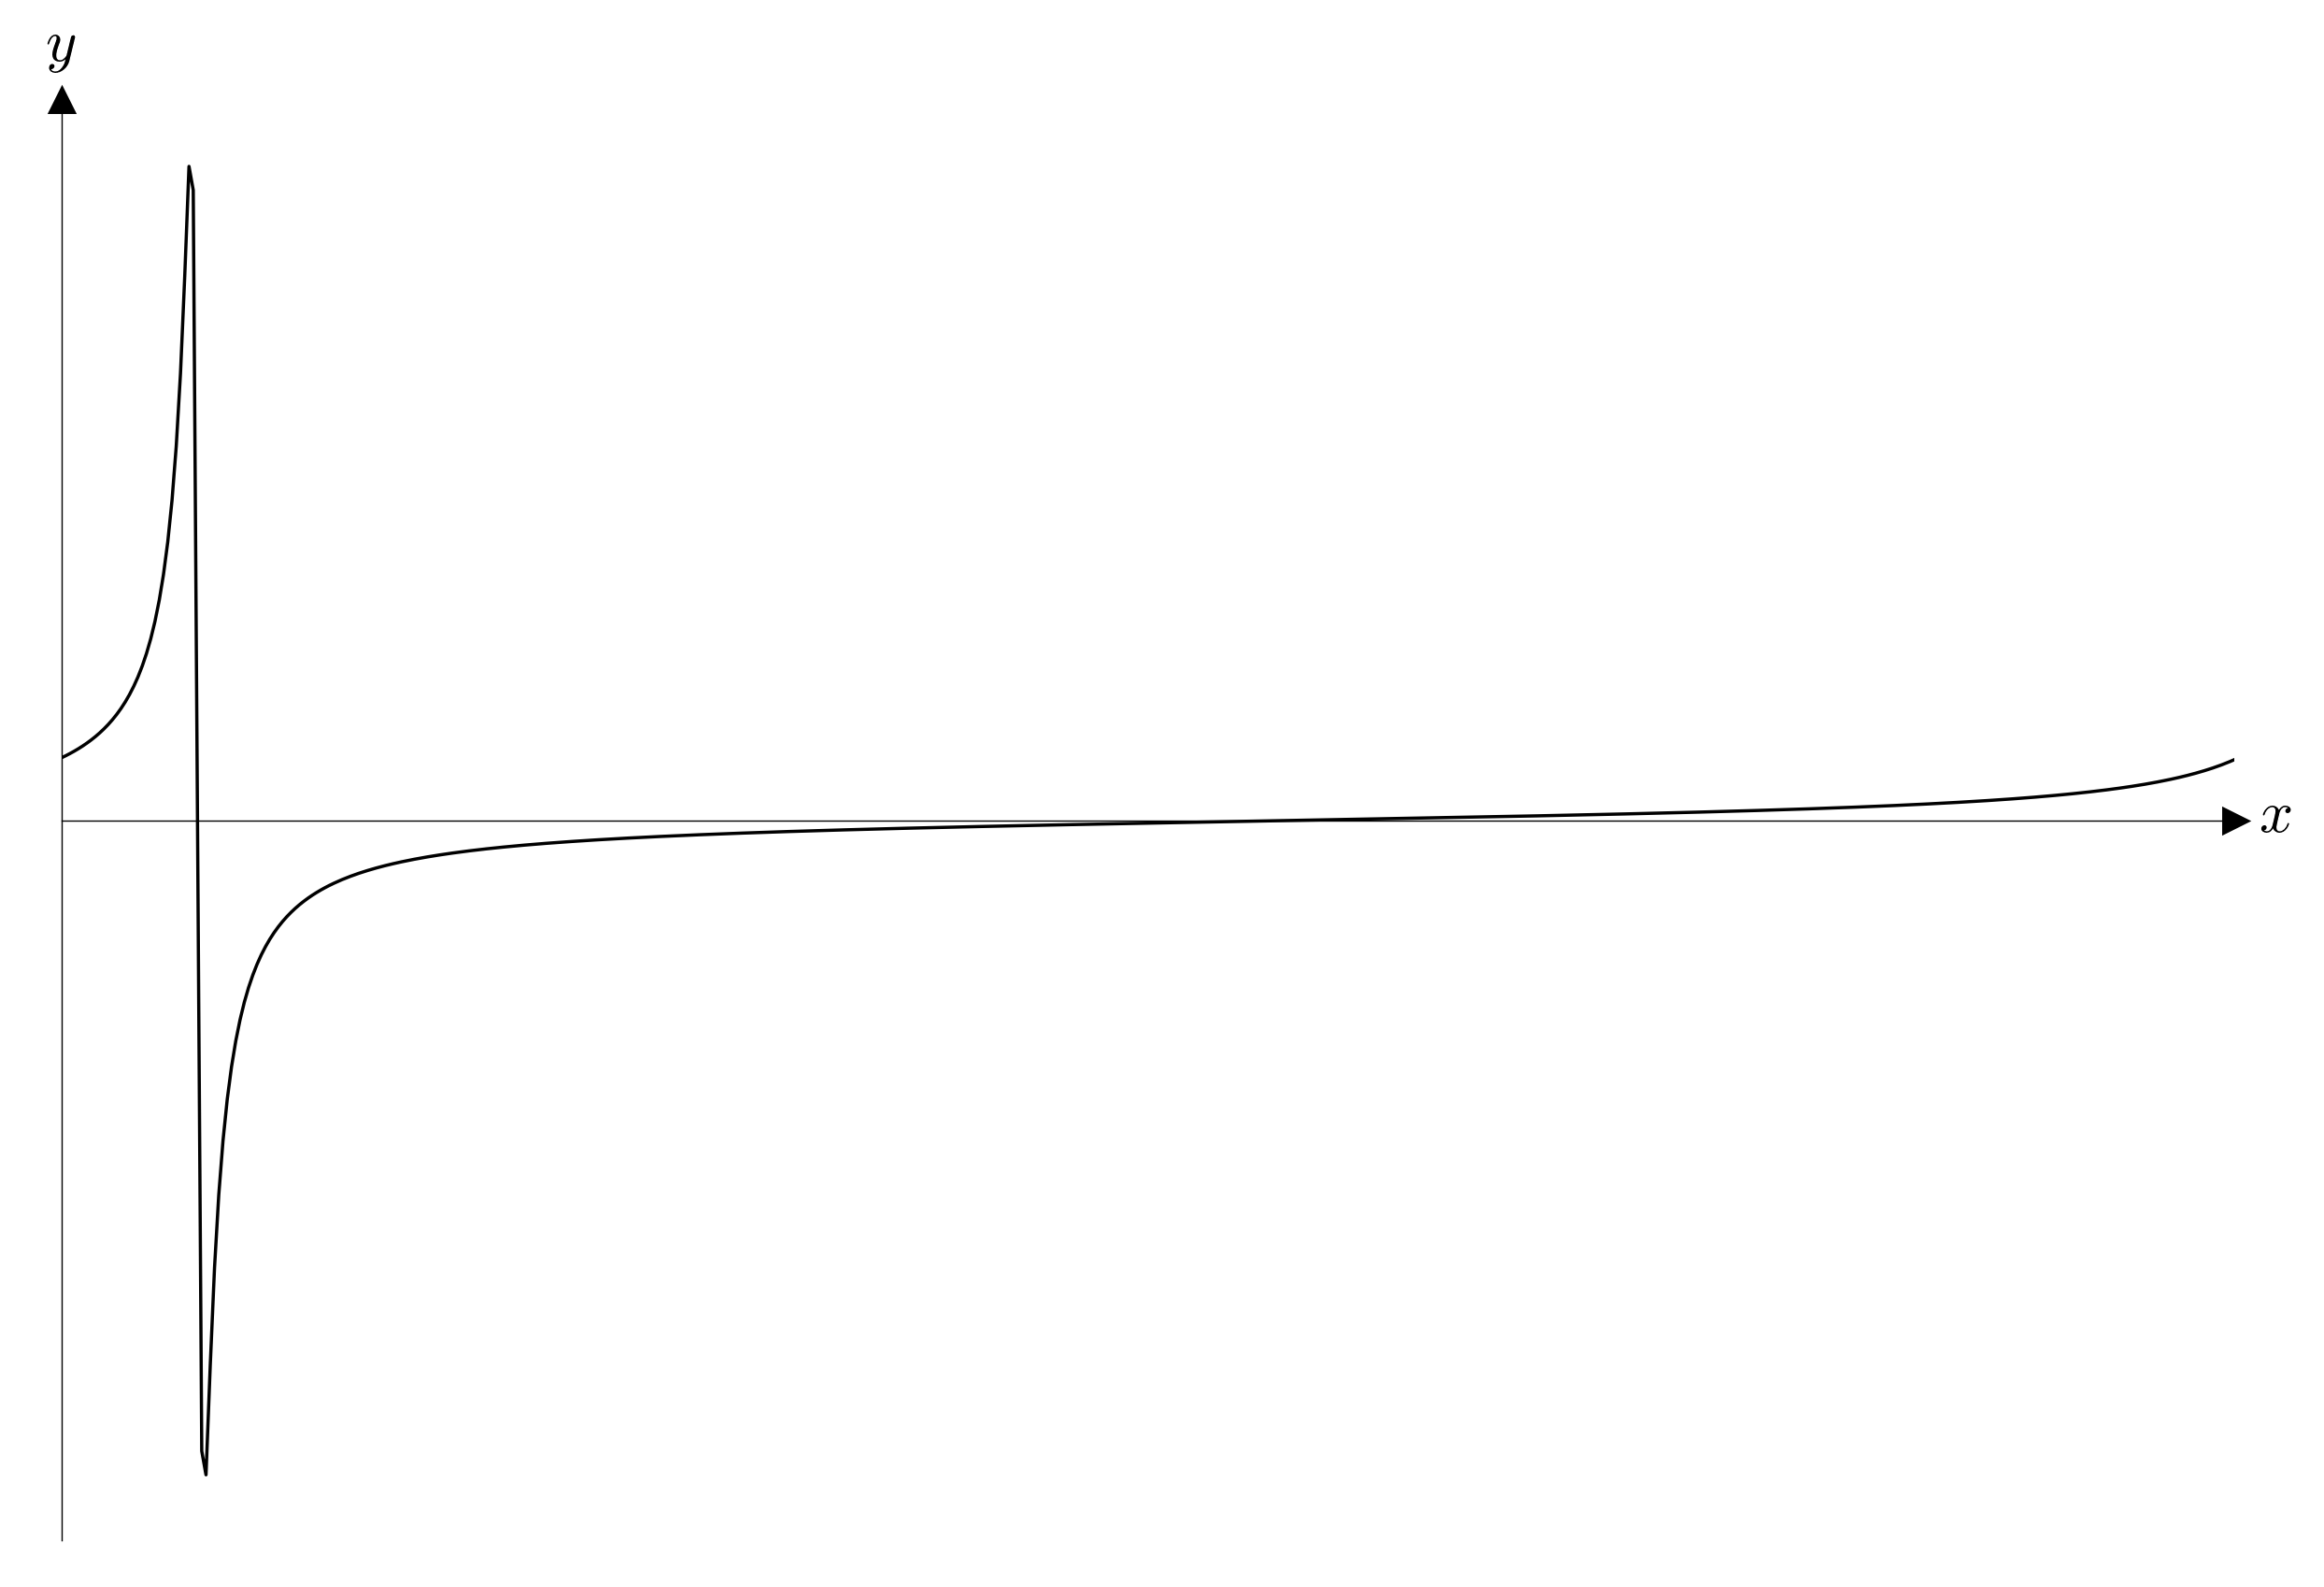

In [22]:
graph(f_n, Y.imag)

In [23]:
lor = ftnmr.lorentzian(r=4.5, f_max=10.0, f0=5.0)

In [24]:
ind = len(lor.f)//2
print(ind)
print(lor.f[ind])
print(lor.lorz()[ind])

16384
5.0
(0.2222222222222222+0j)


0.0    9.99969482421875    0.0044677853016627765    0.2222222222222222


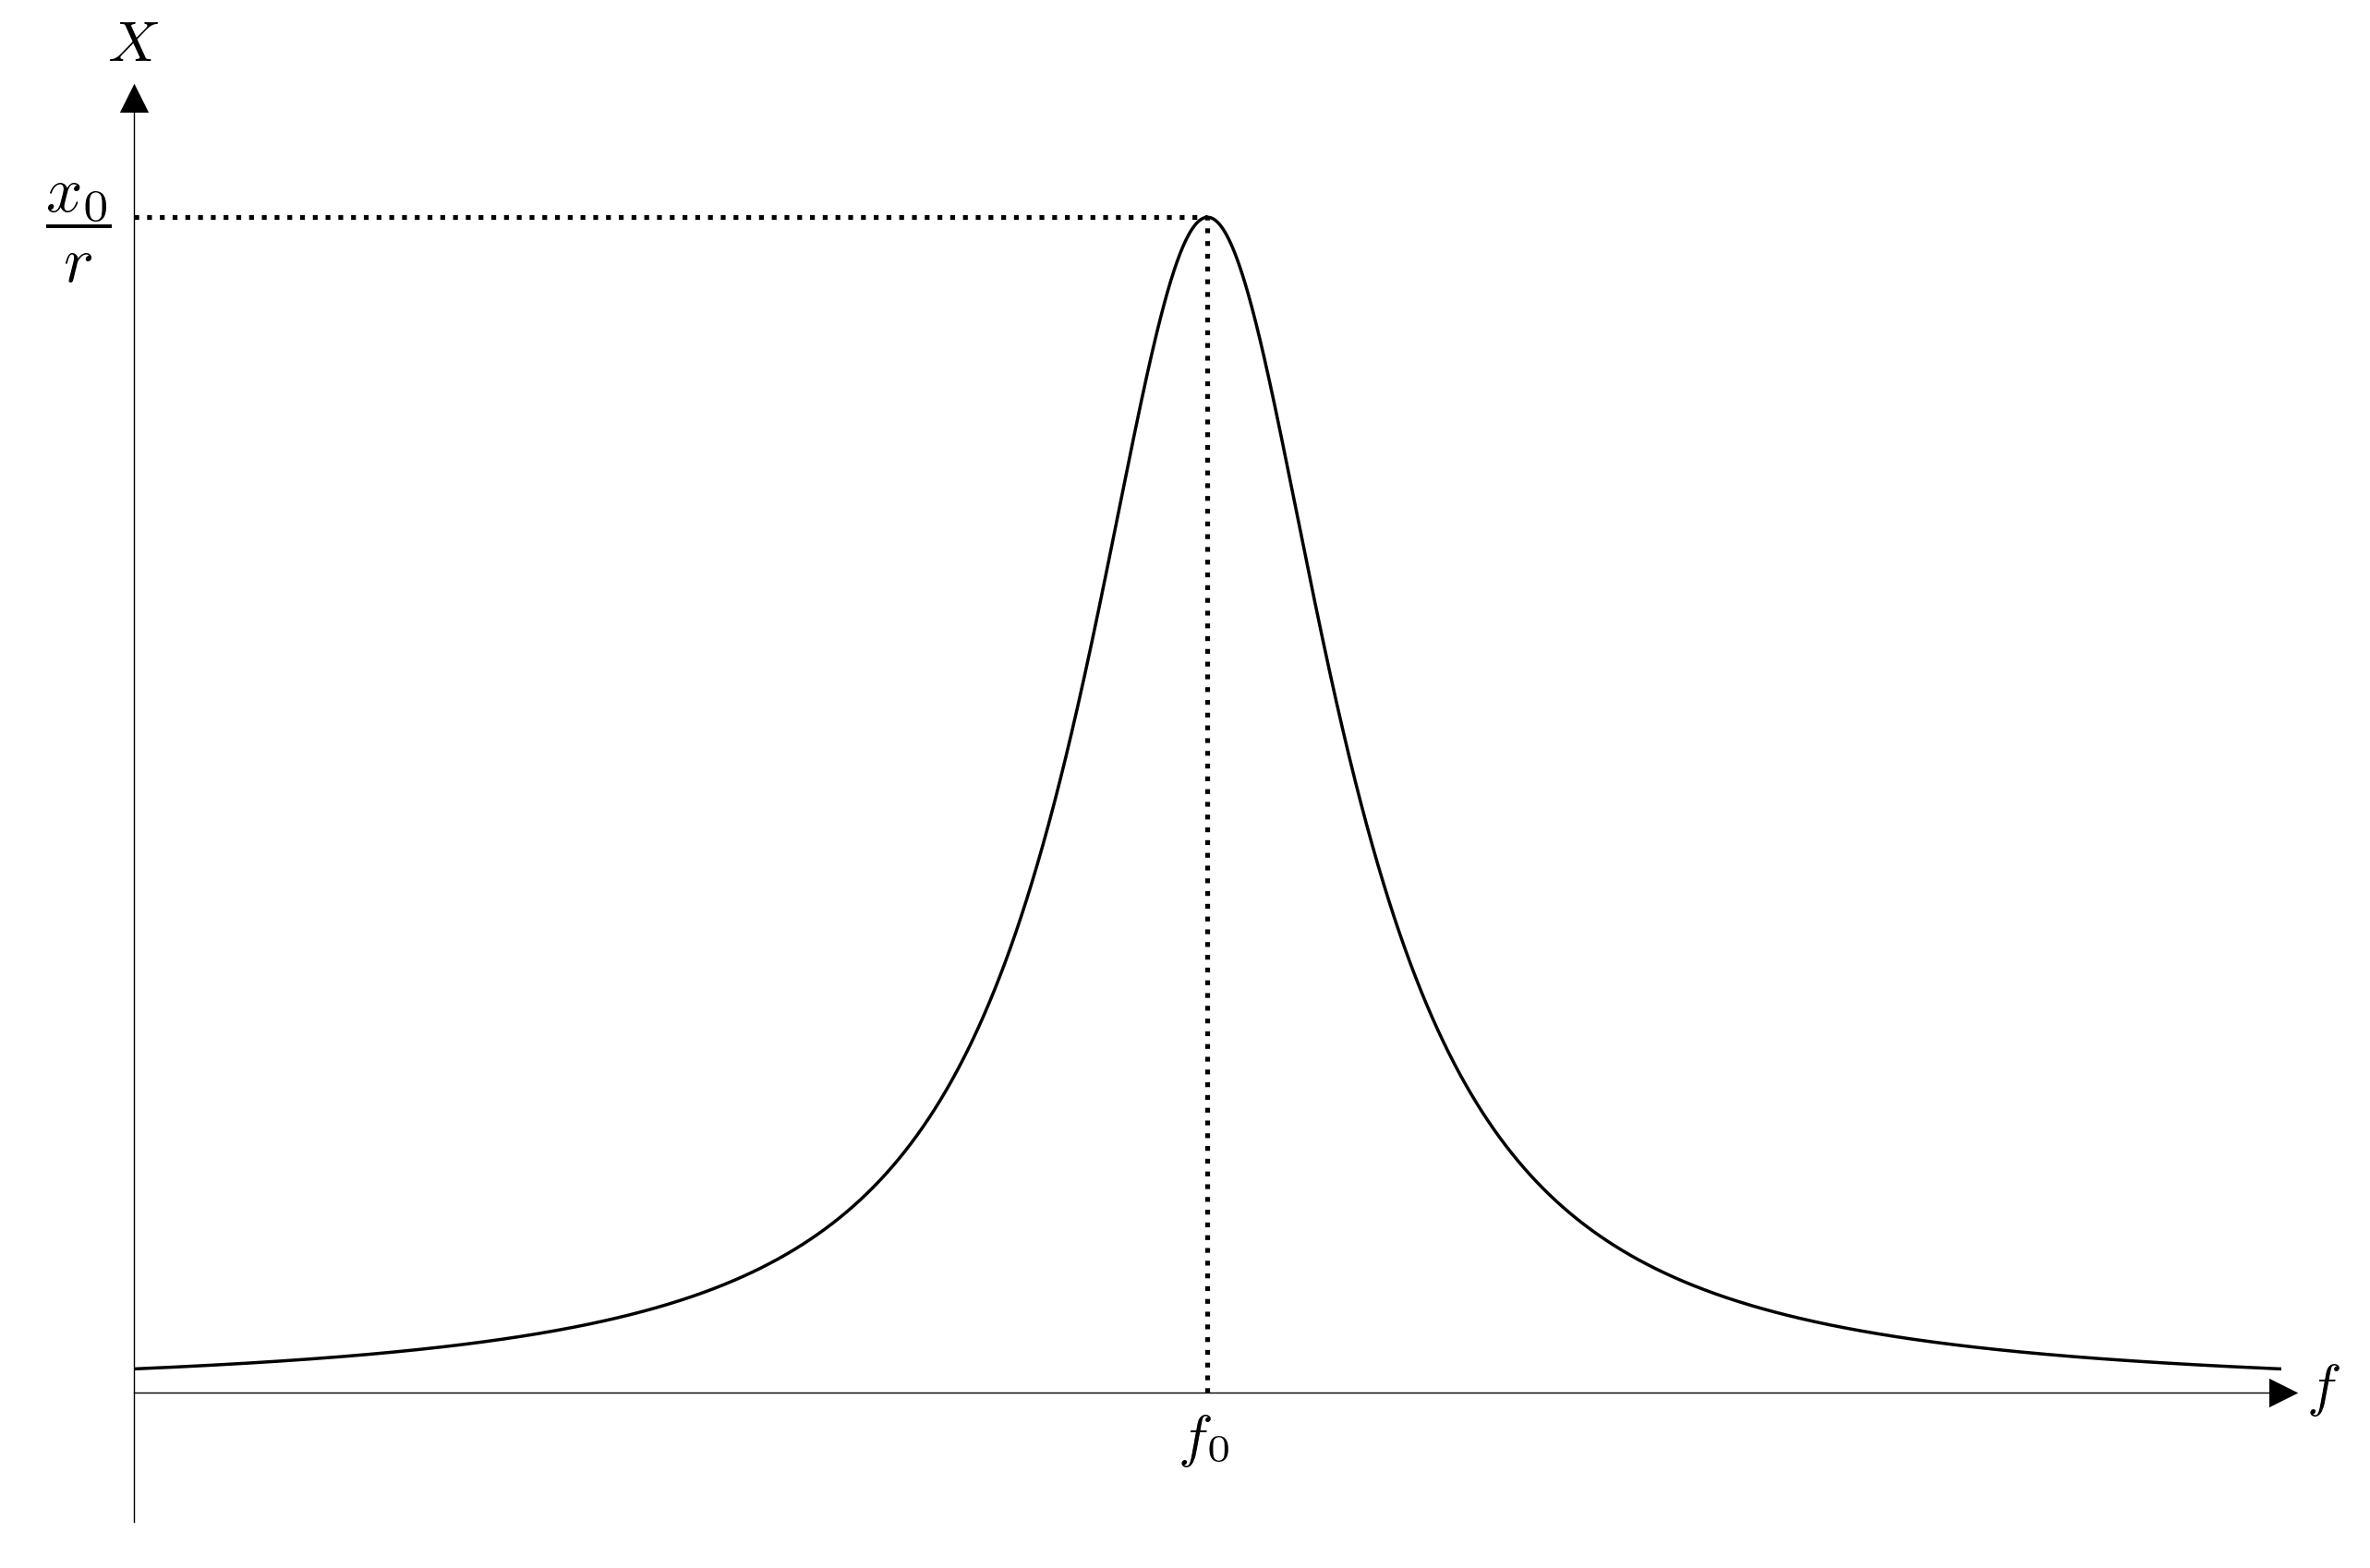

In [74]:
# frequency range and lorentzian output
freq = lor.f
lorz = lor.lorz().real

# index of detected frequency for x and y values
ind = len(freq)//2
xvalue = freq[ind]
yvalue = lorz[ind]

# x and y labels and tick locations for detected frequency
xtick_locations=[xvalue]
xtick_labels=[r'$f_{0}$']
ytick_locations=[yvalue]
ytick_labels=[r'$\mbox{\Large$\frac{x_{0}}{r}$}$']

# plot
mods.graph(
    lor.f, 
    lor.lorz().real, 
    xlabel=r'$f$', 
    ylabel=r'$X$', 
    xtick_locations=xtick_locations,
    xtick_labels=xtick_labels,
    ytick_locations=ytick_locations,
    ytick_labels=ytick_labels,
    show=False)

# Get the y-coordinate limits
y_min, y_max = plt.gca().get_ylim()

# Calculate the normalized y-coordinate for vertical line
y_coord1 = (0 - y_min) / (y_max - y_min)
y_coord2 = (yvalue - y_min) / (y_max - y_min)

# custom vertical line on the graph
plt.axvline(
    x=xtick_locations, 
    color='black', 
    linestyle=':', 
    linewidth=0.75,
    ymin=y_coord1,
    ymax=y_coord2)

# Get the x-coordinate limits
x_min, x_max = plt.gca().get_xlim()

# Calculate the normalized x-coordinate for horizontal line
x_coord1 = (0 - x_min) / (x_max - x_min)
x_coord2 = (xvalue - x_min) / (x_max - x_min)

# custom horizontal line on the graph
plt.axhline(
    y=ytick_locations, 
    color='black', 
    linestyle=':', 
    linewidth=0.75,
    xmin=x_coord1,
    xmax=x_coord2)

# save the figure
plt.savefig('Lorentzian_R.eps', format='eps', transparent=True)
    
plt.show()

0.0    9.99969482421875    -0.11111111083694036    0.11111111083694036


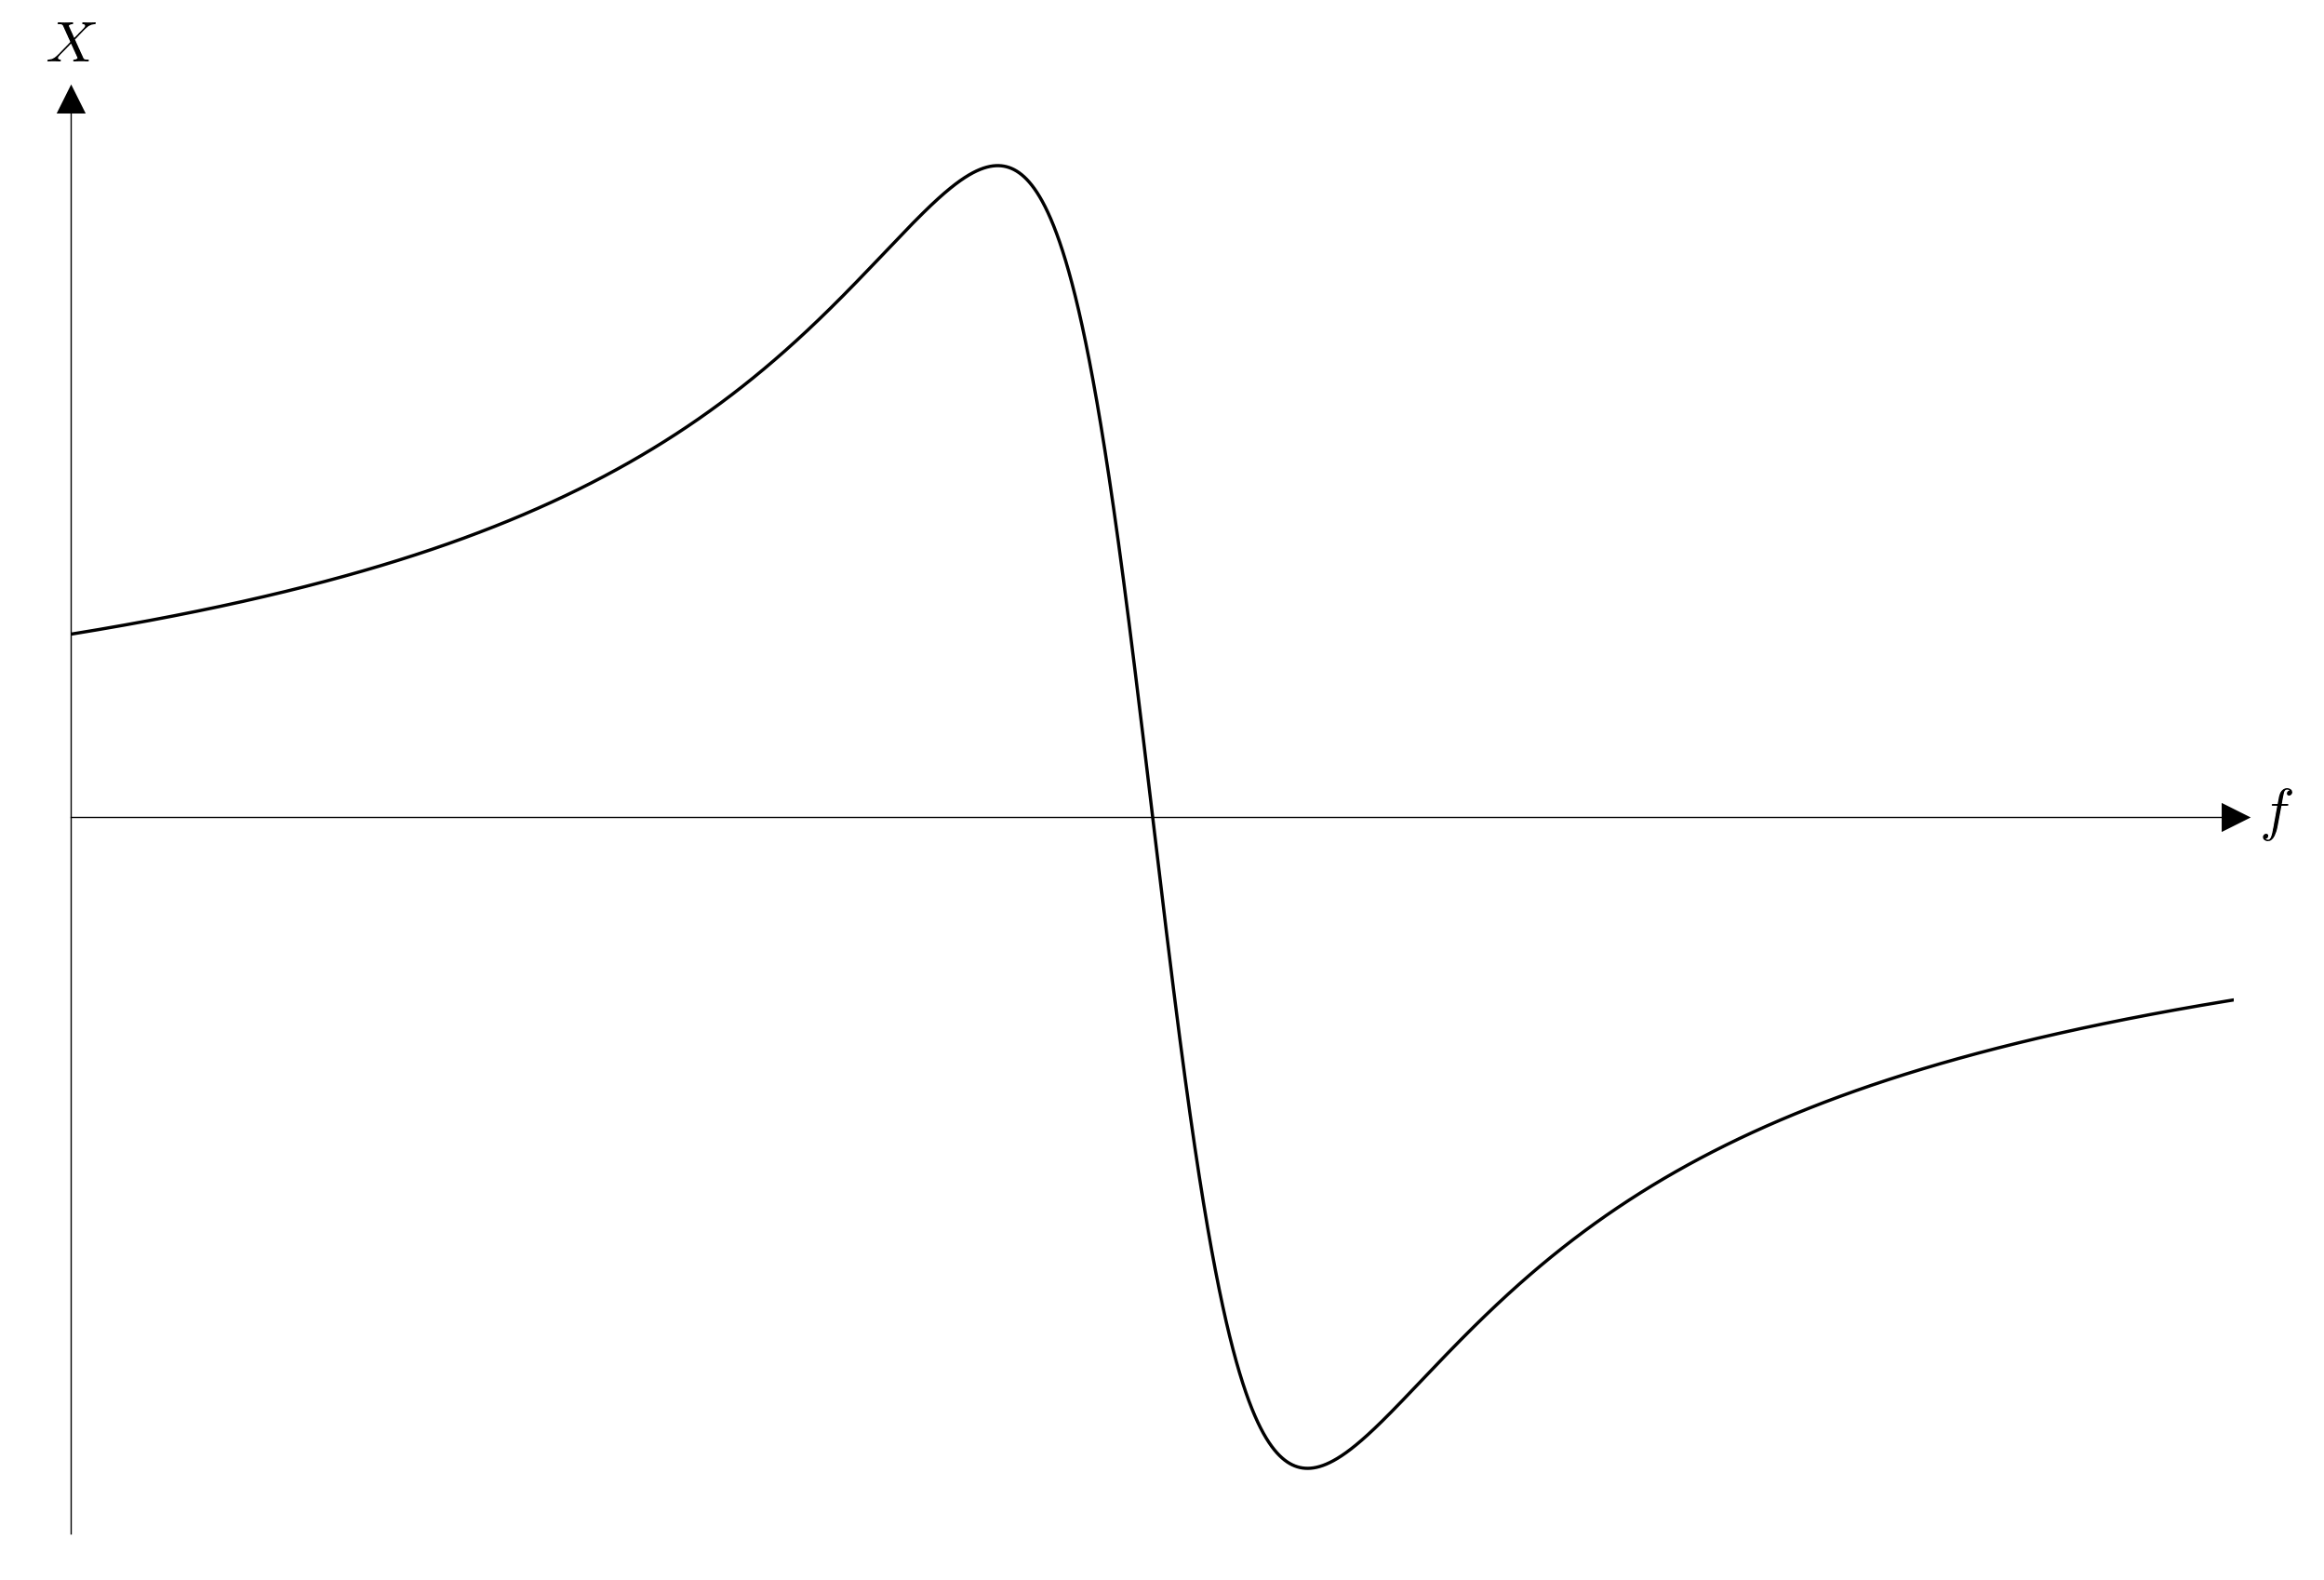

In [76]:
mods.graph(
    lor.f, 
    lor.lorz().imag, 
    xlabel=r'$f$', 
    ylabel=r'$X$', 
    show=False)

# save the figure
plt.savefig('Lorentzian_L.eps', format='eps', transparent=True)

plt.show()

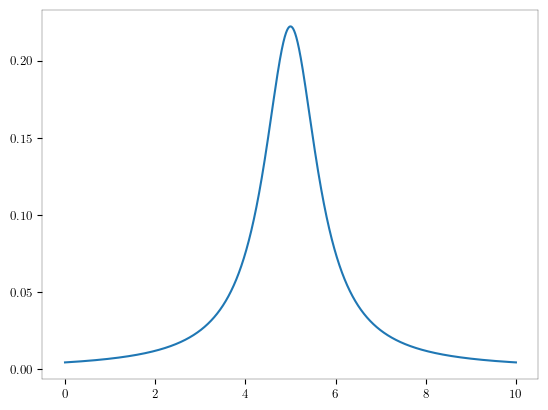

In [27]:
plt.plot(lor.f, lor.lorz().real)
plt.show()

In [57]:
# frequency range and lorentzian output
freq = lor.f
lorz = lor.lorz().real

# relasivity, f0 and full width at half maximum (FWHM)
r, f_max, f0 = 4.5, 10.0, 5.0
f_low = f0 - 0.5*r/np.pi
f_high = f0 + 0.5*r/np.pi
ind_low = np.abs(freq - f_low).argmin()
ind_high = np.abs(freq - f_high).argmin()
half_maximum = lorz[ind_low]

# update f range limits
f_low = freq[ind_low]
f_high = freq[ind_high]

# detected frequency should be f0
ind = len(freq)//2
assert freq[ind] == f0 

In [54]:
f_low

4.283802756086471

In [47]:
lorz[ind_high]

0.11110330554679497

In [66]:
f_low_locations + f_high_locations

[4.28375244140625, 5.71624755859375]

0.0    9.99969482421875    0.0044677853016627765    0.2222222222222222


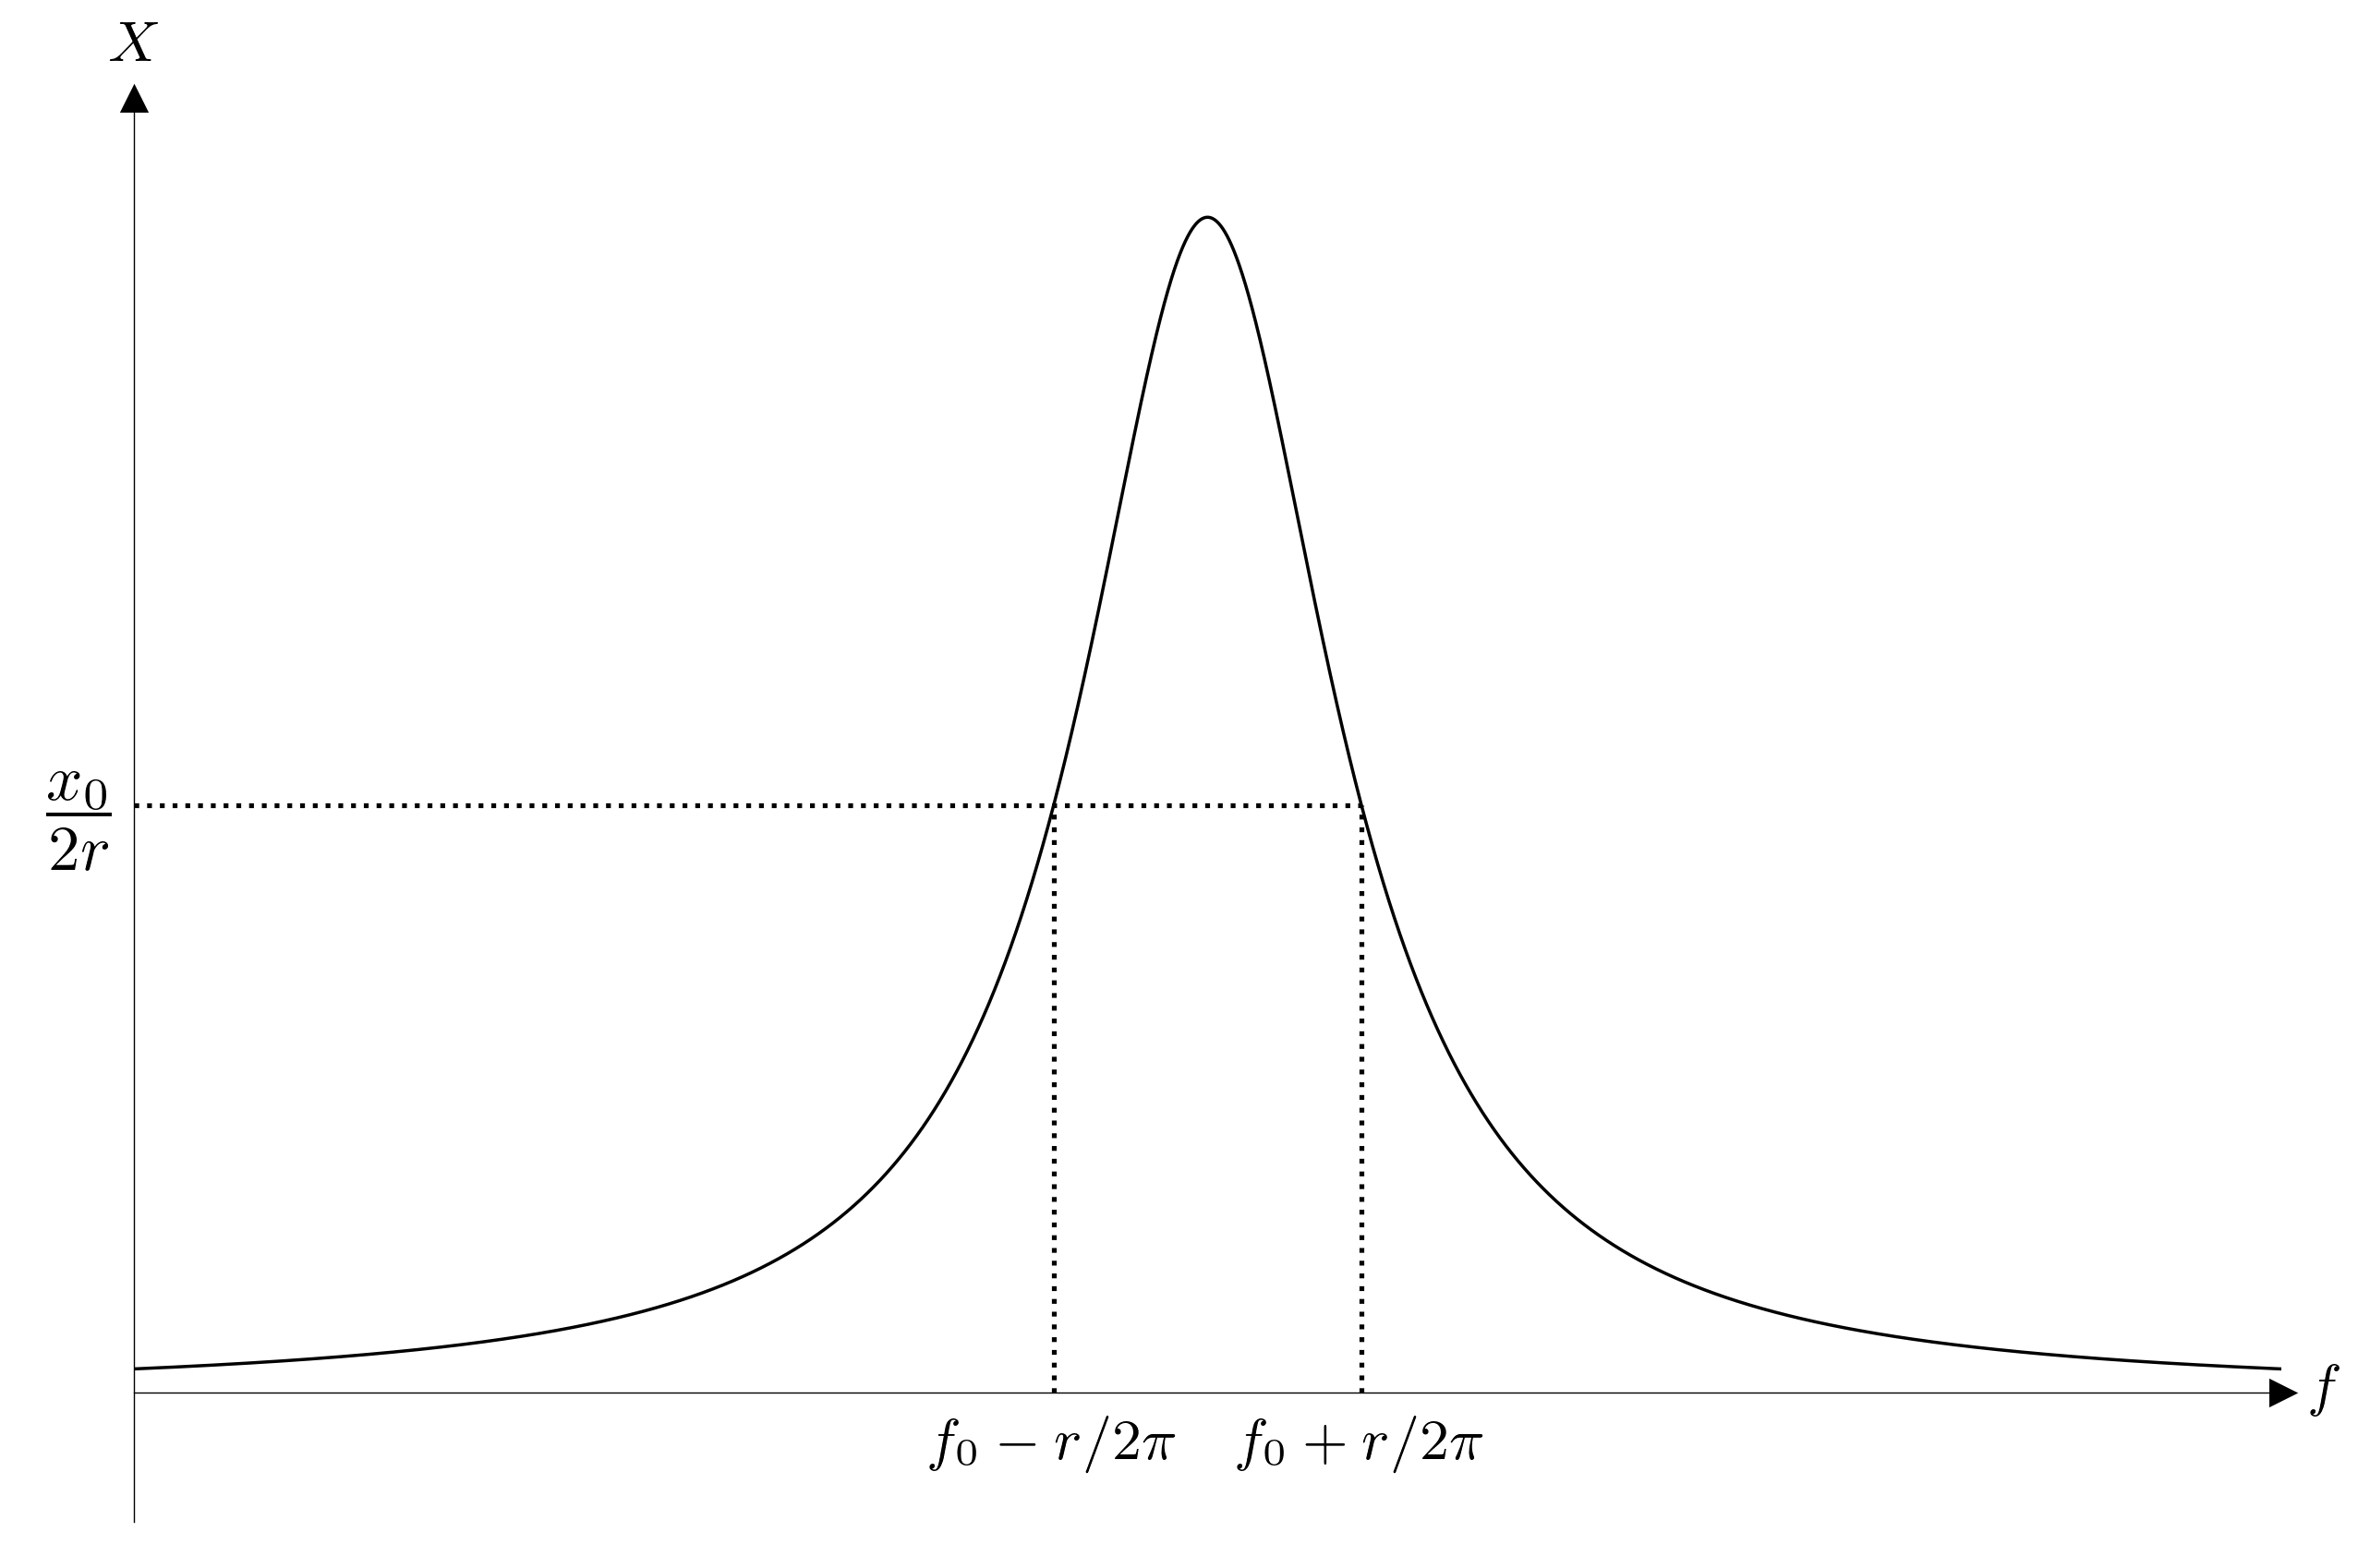

In [77]:
# x and y labels and tick locations for detected frequency
f_low_locations=[f_low]
f_low_labels=[r'$f_{0} - r/2\pi$']
f_high_locations=[f_high]
f_high_labels=[r'$f_{0} + r/2\pi$']
half_maximum_locations=[half_maximum]
half_maximum_labels=[r'$\mbox{\Large$\frac{x_{0}}{2r}$}$']

# plot
mods.graph(
    lor.f, 
    lor.lorz().real, 
    xlabel=r'$f$', 
    ylabel=r'$X$', 
    xtick_locations=f_low_locations + f_high_locations,
    xtick_labels=f_low_labels + f_high_labels,
    ytick_locations=half_maximum_locations,
    ytick_labels=half_maximum_labels,
    save=False,
    show=False)

# Get the y-coordinate limits
y_min, y_max = plt.gca().get_ylim()

# Calculate the normalized y-coordinate for vertical line
y_coord1 = (0 - y_min) / (y_max - y_min)
y_coord2 = (half_maximum - y_min) / (y_max - y_min)

# custom vertical lines on the graph
plt.axvline(
    x=f_low_locations, 
    color='black', 
    linestyle=':', 
    linewidth=0.75,
    ymin=y_coord1,
    ymax=y_coord2)

plt.axvline(
    x=f_high_locations, 
    color='black', 
    linestyle=':', 
    linewidth=0.75,
    ymin=y_coord1,
    ymax=y_coord2)

# Get the x-coordinate limits
x_min, x_max = plt.gca().get_xlim()

# Calculate the normalized x-coordinate for horizontal line
x_coord1 = (0 - x_min) / (x_max - x_min)
x_coord2 = (f_high - x_min) / (x_max - x_min)

# custom horizontal line on the graph
plt.axhline(
    y=half_maximum, 
    color='black', 
    linestyle=':', 
    linewidth=0.75,
    xmin=x_coord1,
    xmax=x_coord2)

# save the figure
plt.savefig('FWHM.eps', format='eps', transparent=True)

plt.show()